python3 -m pip install keras numpy matplotlib tensorflow jupyterlab np_utils opencv-python

In [3]:
# Trabalho com o MNIST - numeros manuscritos
from keras.datasets import mnist

# Carregando o dataset separando os dados de treino e de teste 
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


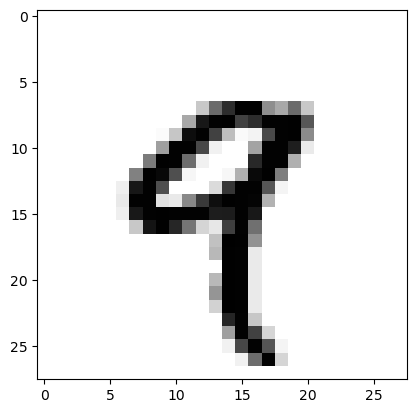

In [4]:
# Permite imprimir dentro do notebook Python
import matplotlib.pyplot as plt
%matplotlib inline


# Exemplo de um dado do dataset
plt.imshow(x_treino[4], cmap='gray_r')

In [5]:
# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
from keras.utils import to_categorical
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

In [6]:
# Verificação da saída one-hot encoding
print(y_treino[0]) #Valor da classe
print(y_treino_cat[0]) #Representação onehot

# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

5
[          0           0           0           0           0           1           0           0           0           0]


In [7]:
# Reshape dos dados de entrada para adicionar o canal de cor
x_treino = x_treino.reshape(len(x_treino), 28, 28, 1)
x_treino_norm = x_treino_norm.reshape(len(x_treino_norm), 28, 28, 1)
x_teste = x_teste.reshape(len(x_teste), 28, 28, 1)
x_teste_norm = x_teste_norm.reshape(len(x_teste_norm), 28, 28, 1)

In [18]:

# Importação das bibliotecas necessárias para treinar a rede
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D

# Criação do modelo LeNet5
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', strides=1, activation='relu', data_format='channels_last', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/rodrigo-07/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,842 (3.27 MB)

 Trainable params: 853,578 (3.26 MB)

 Non-trainable params: 3,264 (12.75 KB)

In [21]:
from keras.optimizers import Adam

adam = Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
# # Fit the Model
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
#                               validation_data = (x_test, y_test), verbose=1, 
#                               steps_per_epoch=x_train.shape[0] // batch_size,
#                               callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy

In [35]:
# Realiza o treinamento do modelo
historico = model.fit(x_treino_norm, y_treino_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9863 - loss: 0.0500 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9889 - loss: 0.0389 - val_accuracy: 0.9921 - val_loss: 0.0323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9905 - loss: 0.0347 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9905 - loss: 0.0328 - val_accuracy: 0.9928 - val_loss: 0.0270
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9932 - val_loss: 0.0304


In [36]:
# Accuraccia

print(historico.history['accuracy'])

[0.9864333271980286, 0.9879500269889832, 0.9898166656494141, 0.9903333187103271, 0.9915833473205566]


Text(0, 0.5, 'acuracia')

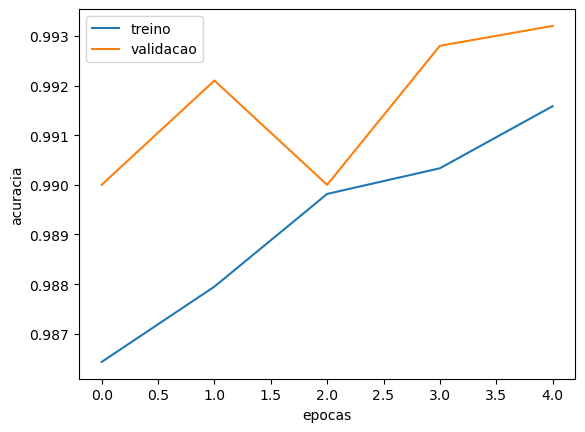

In [37]:
# Exibe o histórico do treinamento
# Graficos de perda e acurácia
# Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

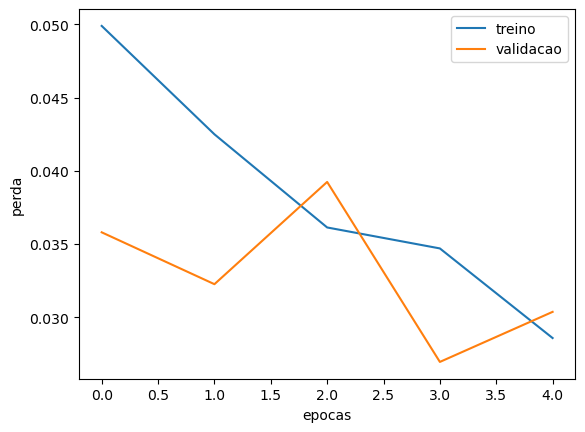

In [38]:


# Perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

In [39]:
# Salva o modelo
model.save('modelo_mnist.h5')


In [40]:
# Realiza uma predição com o modelo
predicao = model.predict(x_teste_norm[0].reshape(1, 28, 28, 1))
print(predicao)
# Exibe a classe com a maior probabilidade de ser a correta da predição
import numpy as np
np.argmax(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 4.4448e-13  2.9724e-10   4.979e-10  4.7806e-10  5.3551e-10  3.0031e-11  8.4023e-11           1  2.5468e-11  1.2647e-09]]


7

In [42]:
img = 'imgTest/sete.jpg'

from keras.preprocessing import image
img = image.load_img(img, target_size=(28, 28), color_mode='grayscale')
img = image.img_to_array(img)
img = img/255
img = img.reshape(1, 28, 28, 1)

predicao = model.predict(img)

print(predicao)
print(np.argmax(predicao))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[    0.65824     0.23156  0.00022627  4.6923e-07    0.068566  3.8416e-08  1.3771e-06  4.2513e-07    0.041366  3.7371e-05]]
0


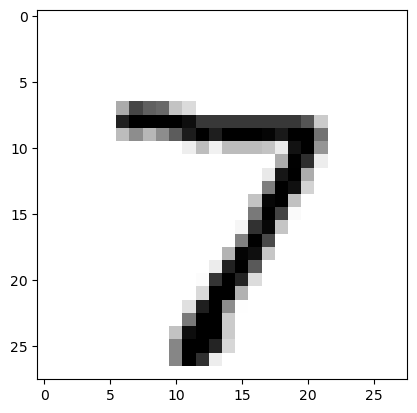

In [43]:
plt.imshow(x_teste[0], cmap='gray_r')